# Serial Recall Accuracy Curve

In **serial recall** tasks, participants study a list of items in a specific order and must then recall them **in that same order**. Unlike *free recall* (where recall order is irrelevant), serial recall scoring considers a response correct only if the item is produced in its **original study position**.

The **Serial Recall Accuracy Curve (SRAC)** plots the probability of correctly recalling each list position—specifically, the fraction of trials on which the item studied at position *i* was correctly recalled **in** position *i*.

In [1]:
from jax import jit
from jaxcmr.analyses.srac import srac, plot_srac
import os

from jaxcmr.helpers import find_project_root, generate_trial_mask, load_data


/Users/jordangunn/jaxcmr/.venv/lib/python3.12/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/Users/jordangunn/jaxcmr/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:440: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  return fun(*args, **kwargs)


Array([0.21666667, 0.16428572, 0.10476191, 0.07380953, 0.04761905,
       0.0452381 , 0.02857143, 0.02142857, 0.03095238, 0.02380952,
       0.02380952, 0.01904762, 0.01428572, 0.01190476, 0.01428572,
       0.01428572, 0.01190476, 0.00714286, 0.0047619 , 0.00238095,
       0.00952381, 0.0047619 , 0.00238095, 0.00714286, 0.        ,
       0.00238095, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],      dtype=float32)

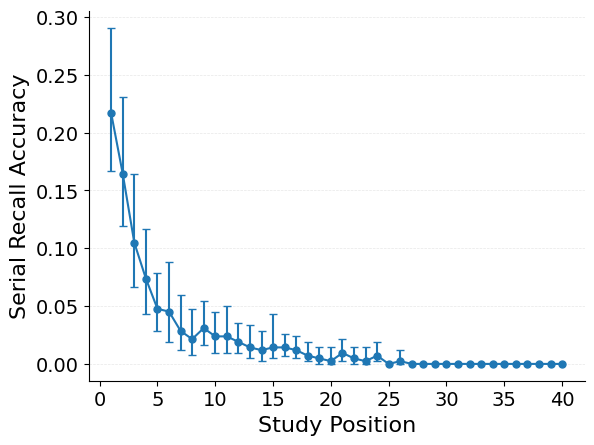

In [2]:
# parameters
run_tag = "SRAC"
data_query = "data['list_type'] == 1"
data_path = os.path.join(find_project_root(), "data/LohnasKahana2014.h5")

# set up data structures
data = load_data(data_path)
recalls = data["recalls"]
presentations = data["pres_itemnos"]
list_length = data["listLength"][0].item()
trial_mask = generate_trial_mask(data, data_query)

# plot SPC
plot_srac(data, generate_trial_mask(data, data_query))
jit(srac)(recalls[trial_mask], presentations[trial_mask], list_length)


Array([0.97699654, 0.9479167 , 0.9305556 , 0.91883683, 0.8936632 ,
       0.85546875, 0.        , 0.        , 0.        ], dtype=float32)

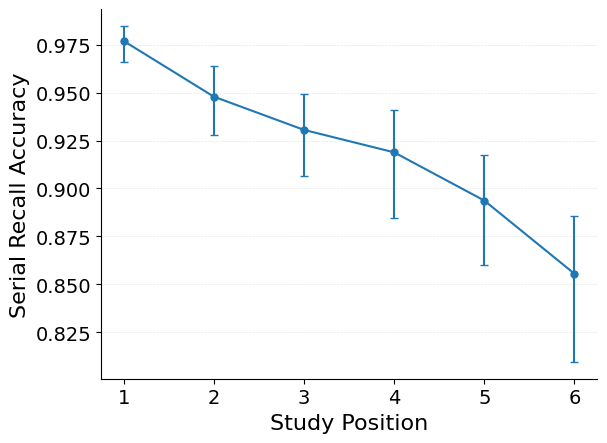

In [4]:
# parameters
run_tag = "SRAC"
data_name = "GordonRanschburg2021"
data_query = "jnp.logical_and(data['condition'] == 1, data['lag'] != 4)"
# data_query = "data['condition'] == 2"
data_path = os.path.join(find_project_root(), "data/RepeatedRecallsGordonRanschburg2021.h5")

# set up data structures
data = load_data(data_path)
arr = data["recalls"]
presentations = data["pres_itemnos"]
list_length = data["listLength"][0].item()
trial_mask = generate_trial_mask(data, data_query)

# plot SPC
plot_srac(data, generate_trial_mask(data, data_query))
srac(arr[trial_mask], presentations[trial_mask], list_length)
# plt.ylim(0, 1);
